In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import argparse as args
import collections

In [2]:
train_path = './data/raw/train.csv'
test_path = './data/raw/test.csv'

train_df = pd.read_csv(train_path, header=None, names=['rating', 'review'])
test_df = pd.read_csv(test_path, header=None, names=['rating', 'review'])

print(f'train_df null values: {train_df.isnull().values.any()}')
print(f'test_df null values: {test_df.isnull().values.any()}')

train_df null values: False
test_df null values: False


In [3]:
print(f'train_df shape: {train_df.shape}')
train_df.head()

train_df shape: (560000, 2)


,rating,review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [4]:
print(f'test_df shape: {test_df.shape}')
test_df.head()

test_df shape: (38000, 2)


,rating,review
0,1,Ordered a large Mango-Pineapple smoothie. Stay...
1,2,Quite a surprise! \n\nMy wife and I loved thi...
2,1,"First I will say, this is a nice atmosphere an..."
3,2,I was overall pretty impressed by this hotel. ...
4,1,Video link at bottom review. Worst service I h...


In [6]:
pd.concat([train_df, test_df])['rating'].unique() # unique vals

array([1, 2], dtype=int64)

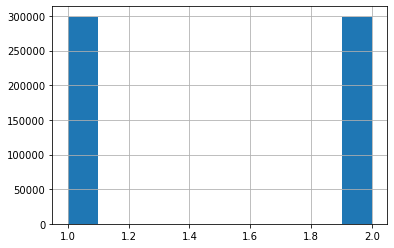

In [8]:
pd.concat([train_df, test_df])['rating'].hist()

In [10]:
ds_df = pd.concat([train_df, test_df])
neg_df = ds_df.loc[ds_df['rating']==1]
pos_df = ds_df.loc[ds_df['rating']==2]

In [14]:
neg_df.iloc[100]['review']

'Visited the Dave and Busters in Homestead, PA last night. Waitress mixed up our credit cards and gave my brothers credit card to someone else and he theirs. Charged them already too - both incorrectly My brother had to walk around and find out who it was. Waitress never apologized. GM was extremely rude and refused to give my brother his original receipt back saying they had thrown it out. DID NOTHING TO REMEDY the situation and ignored us the rest of our visit - not even a refill. After spending over $300 plus games, we will never go back. Whatever happened to the customer is always right? HORRIBLE service'

In [16]:
pos_df.iloc[100]['review']

"An excellent choice for fresh, well prepared seafood located in the Waterfront area in Homestead.   I frequent this area for business travel, and you can't do much better without heading downtown.\\n\\nThe seafood is excellent, with a daily menu crammed full of fresh fish specials, a raw bar, and a list of chef's specialties.  The house salad is sweet and delicious, and the 'shanghai' seafood preparation is delicious, healthy, and unique.  Try it with the scallops or a white-fleshed fish.\\n\\nThere is a nice selection of regional beers on tap, a decent selections of wines, and creative drinks (think elderflower and pear martinis).  The deserts are adequate, though not a highlight.  \\n\\nIf you're on the Waterfront, you won't do better than this.  Enjoy!"

In [68]:
bad_words = neg_df['review'].str.split(' ', expand=True).stack().value_counts().to_frame().reset_index()
good_words = pos_df['review'].str.split(' ', expand=True).stack().value_counts().to_frame().reset_index()

bad_words.columns = ['word', 'count']
good_words.columns = ['word', 'count']

In [69]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

bad_words

,word,count
0,the,1927092
1,and,1320015
2,to,1227548
3,I,1176595
4,a,1040350
...,...,...
952248,"\""nationally",1
952249,any'tizers,1
952250,wang-doodle,1
952251,"\""rarebit\""?",1


In [71]:
good_words

,word,count
0,the,1440232
1,and,1169697
2,a,913968
3,I,785676
4,to,753723
...,...,...
853799,improvement.\n\nPro:\n1.,1
853800,Curriculum,1
853801,\u00e9piceries;,1
853802,"mind.\n\nANYWAY,",1


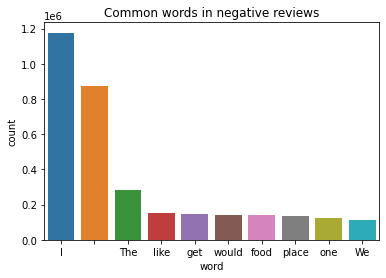

In [86]:
ax = sns.barplot(x='word', y='count', data=bad_words.loc[~bad_words['word'].isin(stop)][:10]).set_title('Common words in negative reviews')

Text(0.5, 1.0, 'Common words in positive reviews')

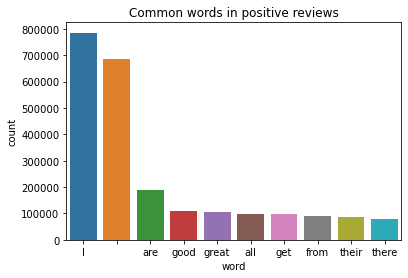

In [87]:
sns.barplot(x='word', y='count', data=good_words.loc[~bad_words['word'].isin(stop)][:10]).set_title('Common words in positive reviews')